In [13]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from category_encoders import TargetEncoder
from sklearn.metrics import r2_score

In [14]:
df=pd.read_csv('test.csv')
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [16]:
x=list(df['name'])
df['name']=df['name'].str.extract(r'^(\w+\s+\w+)')
df[['name']].head(5)

,name
0,Maruti 800
1,Maruti Wagon
2,Hyundai Verna
3,Datsun RediGO
4,Honda Amaze


In [17]:
#encode
le=LabelEncoder()
df['name']=le.fit_transform(df['name'])
df['fuel']=le.fit_transform(df['fuel'])
df['seller_type']=le.fit_transform(df['seller_type'])
df['transmission']=le.fit_transform(df['transmission'])
df['owner']=le.fit_transform(df['owner'])
df.describe()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340.000000,4340.000000,4.340000e+03,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,93.775346,2013.090783,5.041273e+05,66215.777419,2.469124,0.794470,0.896774,0.820276
std,42.704811,4.215344,5.785487e+05,46644.102194,1.508435,0.458629,0.304289,1.233494
min,0.000000,1992.000000,2.000000e+04,1.000000,0.000000,0.000000,0.000000,0.000000
25%,63.000000,2011.000000,2.087498e+05,35000.000000,1.000000,1.000000,1.000000,0.000000
50%,99.000000,2014.000000,3.500000e+05,60000.000000,1.000000,1.000000,1.000000,0.000000
75%,116.000000,2016.000000,6.000000e+05,90000.000000,4.000000,1.000000,1.000000,2.000000
max,179.000000,2020.000000,8.900000e+06,806599.000000,4.000000,2.000000,1.000000,4.000000


In [18]:
meann=df.groupby('name')['selling_price'].mean()
df['mean_price_for_each_name']=df['name'].map(meann)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mean_price_for_each_name
0,97,2007,60000,70000,4,1,1,0,83211.864407
1,116,2007,135000,50000,4,1,1,0,222499.975610
2,69,2012,600000,100000,1,1,1,0,550961.178295
3,27,2017,250000,46000,4,1,1,0,256333.266667
4,47,2014,450000,141000,1,1,1,2,518775.827586


In [19]:
x=df[['mean_price_for_each_name','year','km_driven','fuel','seller_type','transmission','owner']].values
y=df[['selling_price']].values

In [20]:
std=StandardScaler()
x=std.fit_transform(x)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
reg=LinearRegression().fit(x_train,y_train)
y_predict=reg.predict(x_test)
r2_score(y_test,y_predict)

0.8369573771220922

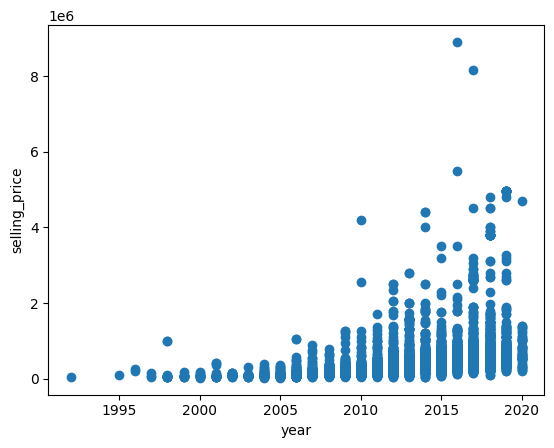

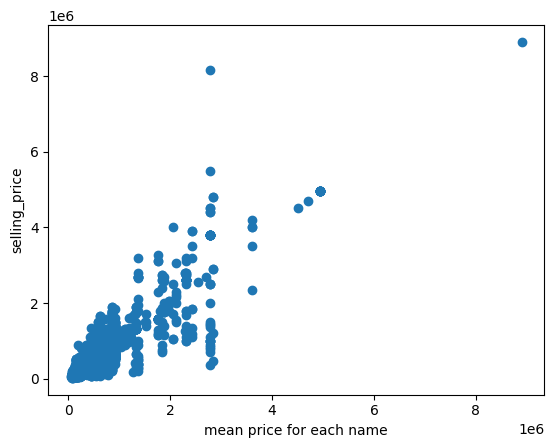

In [23]:
plt.scatter(df['year'],df['selling_price'])
plt.xlabel('year')
plt.ylabel('selling_price')
plt.show()
plt.scatter(df['mean_price_for_each_name'],df['selling_price'])
plt.xlabel('mean price for each name')
plt.ylabel('selling_price')
plt.show()